# 생분해성 재료 분류 AI 경진대회

![image](https://user-images.githubusercontent.com/91044039/206648031-39347727-dda6-48b2-b165-2764c7e6b73f.PNG)

전 세계 많은 국가들이 쓰레기로 인한 생태계 파괴로 고통받고 있습니다. 더 이상 사용할 수 없는 폐기물은 두가지로 분류됩니다.

- 생분해성 재료

  생분해성 재료는 식품, 식물, 과일과 같이 미생물에 의해 자연적으로 분해될 수 있는 재료입니다.

- 비생분해성 재료

  비생분해성 재료는 플라스틱이나 금속과 같이 자연적으로 분해될 수 없는 물질입니다.

비생분해성 재료는 자연적으로 분해되지 않기 때문에, 특정한 처리를 거쳐 재활용해야 합니다. 

어떤 폐기물을 재활용해야 하는지 자동으로 분류하기 위해, 생분해성 재료와 비생분해성 재료를 분류하는 AI 모델을 만들어보세요!

## 1.데이터

### 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 압축 해제

In [2]:
!unzip -qq "/content/drive/MyDrive/ELICE/data.zip"

### 라이브러리

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from keras.preprocessing.image import * 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import * 
from PIL import Image

### 데이터 경로 설정

In [4]:
train_dir = '/content/TRAIN'
test_dir = '/content/TEST'

### 데이터 로드

In [5]:
def load_data(directory):
    images_path = []
    labels = []
    
    for label in os.listdir(directory):
            
        for file_name in os.listdir(directory + '/' + label):
            
            images_path.append(directory + '/' + label + '/' + file_name)
            labels.append(label)
                
    return images_path, labels

In [6]:
train_images, train_labels = load_data(train_dir)
test_images = glob.glob(test_dir+'/*')

- Train셋

In [7]:
train = pd.DataFrame({'path':train_images, 'label':train_labels})
train

,path,label
0,/content/TRAIN/B/TRAIN.4_BIODEG_ORI_23483.jpg,B
1,/content/TRAIN/B/TRAIN.1_BIODEG_ORI_17123.jpg,B
2,/content/TRAIN/B/TRAIN.2_BIODEG_ORI_8152.jpg,B
3,/content/TRAIN/B/TRAIN.1_BIODEG_ORI_16586.jpg,B
4,/content/TRAIN/B/TRAIN.4_BIODEG_ORI_25683.jpg,B
...,...,...
239685,/content/TRAIN/N/TRAIN.2_NBIODEG_HFL_1875.jpg,N
239686,/content/TRAIN/N/TRAIN.2_NBIODEG_HFL_3956.jpg,N
239687,/content/TRAIN/N/TRAIN.3_NBIODEG_CWR_250.jpg,N
239688,/content/TRAIN/N/TRAIN.4_NBIODEG_HFL_2703.jpg,N


- Test셋

In [8]:
test = pd.DataFrame({'path':test_images, 'label':np.NaN})
test

,path,label
0,/content/TEST/13069.jpg,NaN
1,/content/TEST/5219.jpg,NaN
2,/content/TEST/15699.jpg,NaN
3,/content/TEST/10162.jpg,NaN
4,/content/TEST/13316.jpg,NaN
...,...,...
16721,/content/TEST/9697.jpg,NaN
16722,/content/TEST/145.jpg,NaN
16723,/content/TEST/12917.jpg,NaN
16724,/content/TEST/3538.jpg,NaN


### Validation셋 분할

In [9]:
train, validation = train_test_split(train, test_size=0.2, shuffle=True)
len(train), len(validation)

(191752, 47938)

### 데이터 확인

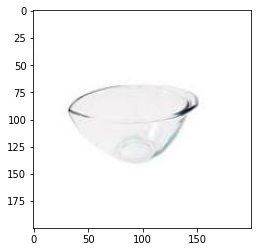

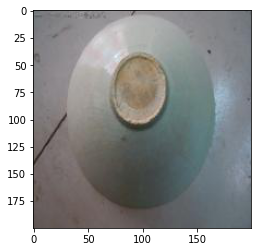

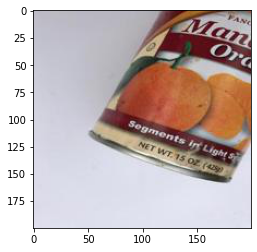

In [10]:
for i in range(3):
  image = Image.open(train['path'].iloc[i])
  plt.imshow(image)
  plt.show()

### label 분포

In [11]:
train['label'].value_counts()

N    95889
B    95863
Name: label, dtype: int64

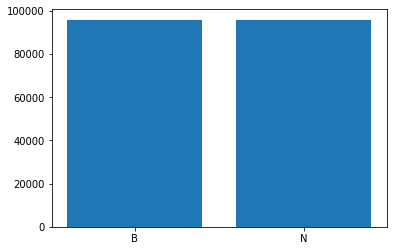

In [12]:
x = ['B', 'N']
y = [train['label'].value_counts()[0], train['label'].value_counts()[1]]

plt.bar(x,y)
plt.show()

## 2.모델링

### 레이어 구성

In [13]:
# 레이어 1
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(60, 60, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어 2 
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 레이어3
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
# Fully Connected 
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation="softmax"))

### 모델 컴파일

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 58, 58, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 29, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 27, 27, 64)       2

### 파라미터

In [15]:
total_train=train.shape[0]
total_validate=validation.shape[0]
batch_size=128
img_size=(60,60)

### 제너레이터

In [16]:
datagen=ImageDataGenerator(rescale=1./255)

### 데이터구성

In [17]:
train_generator=datagen.flow_from_dataframe(
    train, 
    train_dir,
    x_col = "path", 
    y_col = "label",
    target_size = img_size,
    class_mode = "categorical",
    batch_size = batch_size)
    
validation_generator=datagen.flow_from_dataframe(
    validation,
    train_dir,
    x_col= "path",
    y_col= "label",
    target_size = img_size,
    class_mode = "categorical",
    batch_size = batch_size )

test_generator=datagen.flow_from_dataframe(
    test,
    test_dir,
    x_col= "path",
    y_col= None,
    target_size = img_size,
    class_mode = None,
    batch_size = batch_size,
    shuffle = False)

Found 191752 validated image filenames belonging to 2 classes.
Found 47938 validated image filenames belonging to 2 classes.
Found 16726 validated image filenames.


### 제너레이터 확인

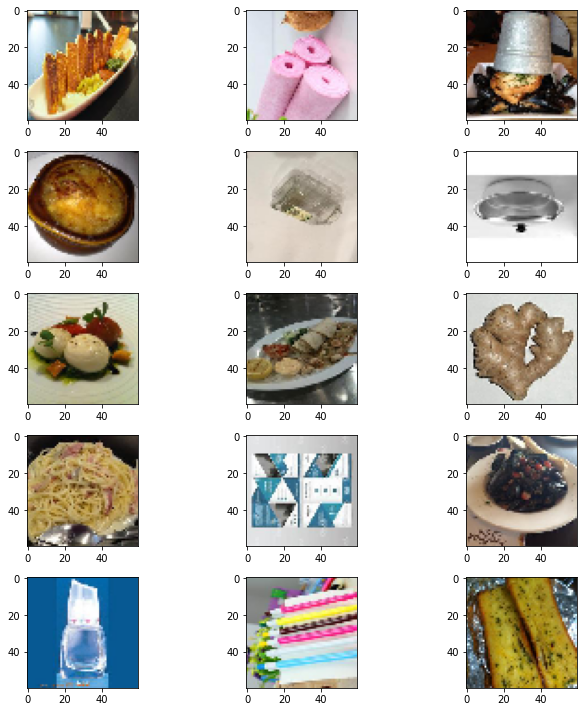

In [18]:
plt.figure(figsize=(10,10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for xBatch, yBatch in train_generator:
        image = xBatch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 모델 학습

In [19]:
epochs = 3 

history = model.fit(
    train_generator, 
    epochs = epochs, 
    steps_per_epoch = total_train//batch_size ,
    validation_data=  validation_generator,
    validation_steps = total_validate//batch_size,
)

model.save_weights("model.h5")

Epoch 1/3
1498/1498 [==============================] - 224s 143ms/step - loss: 0.2463 - accuracy: 0.9050 - val_loss: 0.2238 - val_accuracy: 0.9167
Epoch 2/3
1498/1498 [==============================] - 210s 140ms/step - loss: 0.1887 - accuracy: 0.9262 - val_loss: 0.2306 - val_accuracy: 0.9084
Epoch 3/3
1498/1498 [==============================] - 210s 140ms/step - loss: 0.1734 - accuracy: 0.9329 - val_loss: 0.2124 - val_accuracy: 0.9183


## 3.모델검증

### Accuracy

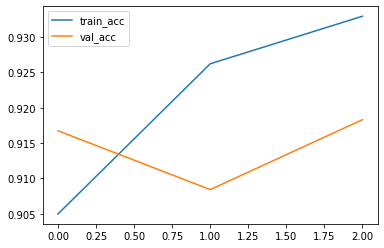

In [20]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(train_acc, label='train_acc')
plt.plot(val_acc, label='val_acc')
plt.legend()
plt.show()

### Loss

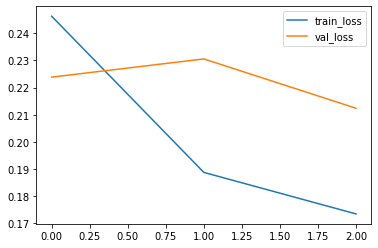

In [21]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.legend()
plt.show()

## 4.추론 및 제출

### 추론

In [22]:
pred = model.predict(test_generator, steps=test.shape[0]/batch_size)
                        
pred=np.argmax(pred, axis=1)

130/130 [==============================] - 15s 114ms/step


### 정답파일 만들기

In [23]:
submission = pd.read_csv('/content/drive/MyDrive/ELICE/sample_submission.csv')
submission['label'] = pred
submission

,path,label
0,/content/TEST/13069.jpg,0
1,/content/TEST/5219.jpg,0
2,/content/TEST/15699.jpg,0
3,/content/TEST/10162.jpg,1
4,/content/TEST/13316.jpg,1
...,...,...
16721,/content/TEST/9697.jpg,0
16722,/content/TEST/145.jpg,0
16723,/content/TEST/12917.jpg,0
16724,/content/TEST/3538.jpg,0


In [24]:
def change_category(num:int):
  if num == 0:
    return 'B'
  else :
    return 'N'

submission['label'] = submission['label'].map(change_category)
submission

,path,label
0,/content/TEST/13069.jpg,B
1,/content/TEST/5219.jpg,B
2,/content/TEST/15699.jpg,B
3,/content/TEST/10162.jpg,N
4,/content/TEST/13316.jpg,N
...,...,...
16721,/content/TEST/9697.jpg,B
16722,/content/TEST/145.jpg,B
16723,/content/TEST/12917.jpg,B
16724,/content/TEST/3538.jpg,B


### 제출

In [25]:
submission.to_csv('submission.csv', index=False)

## 5.채점

참가자에게는 비공개

### 정답파일 불러오기

In [26]:
answer = pd.read_csv('/content/drive/MyDrive/ELICE/answer.csv')
answer

,path,label
0,/content/TEST/13069.jpg,B
1,/content/TEST/5219.jpg,B
2,/content/TEST/15699.jpg,B
3,/content/TEST/10162.jpg,N
4,/content/TEST/13316.jpg,N
...,...,...
16721,/content/TEST/9697.jpg,B
16722,/content/TEST/145.jpg,B
16723,/content/TEST/12917.jpg,B
16724,/content/TEST/3538.jpg,N


### 채점

In [27]:
def acc(real, pred):
  return sum(real == pred)/len(real)

acc(answer['label'], submission['label'])

0.8309219179720196